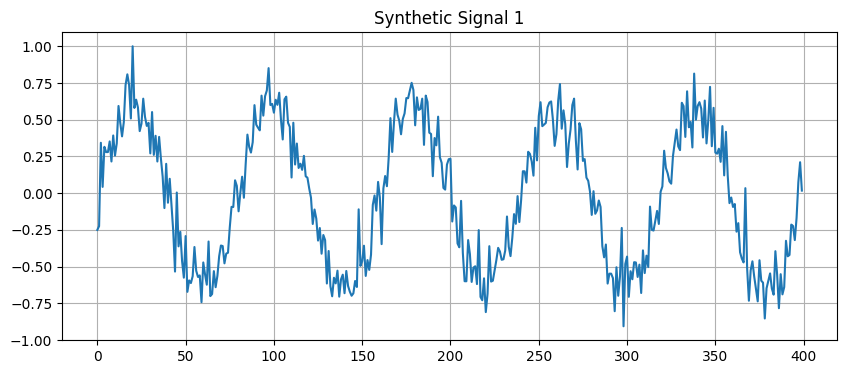

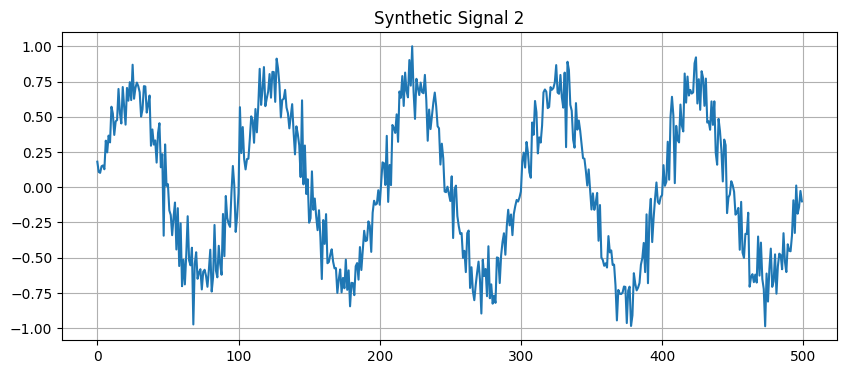

DTW Distance: 47.53906533592346
Alignment Path Length: 574


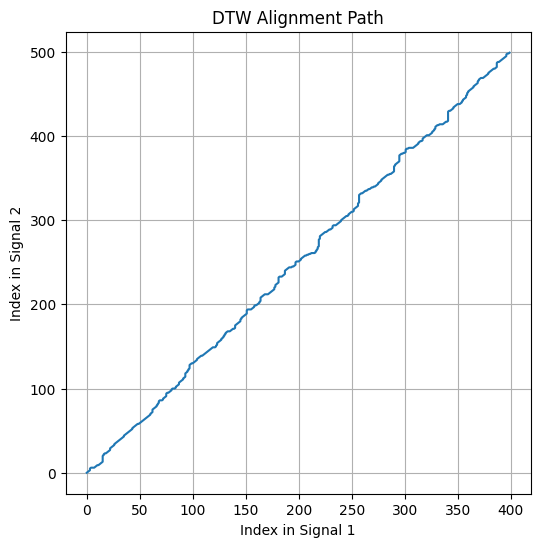


--- INTERPRETATION OF RESULTS ---
The two synthetic signals are highly similar.

Dynamic Time Warping (DTW) Explanation:

DTW aligns two time series that may differ in speed or length.
Even though Signal 2 has more samples (simulating a slower spoken 'hello'),
DTW warps the time axis to find the optimal alignment path.

This is exactly how DTW is used in speech recognition to compare words
spoken at different speeds or with timing variations.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# ============================================================
# 1. Generate two random synthetic "speech-like" signals
# ============================================================

# Time axes (different lengths = different speaking speeds)
t1 = np.linspace(0, 1, 400)   # 400 samples → signal 1
t2 = np.linspace(0, 1, 500)   # 500 samples → signal 2 (stretched)

# Speech-like waveform: sine + noise
sig1 = np.sin(2 * np.pi * 5 * t1) + 0.2 * np.random.randn(len(t1))
sig2 = np.sin(2 * np.pi * 5 * t2) + 0.2 * np.random.randn(len(t2))

# ============================================================
# 2. Normalize both signals
# ============================================================

sig1 = sig1 / np.max(np.abs(sig1))
sig2 = sig2 / np.max(np.abs(sig2))

# ============================================================
# 3. Plot the signals
# ============================================================

plt.figure(figsize=(10,4))
plt.title("Synthetic Signal 1")
plt.plot(sig1)
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
plt.title("Synthetic Signal 2")
plt.plot(sig2)
plt.grid()
plt.show()

# ============================================================
# 4. Apply Dynamic Time Warping (Corrected for your error)
# ============================================================

# Convert to 2D format (each sample is 1 feature vector)
sig1_2d = sig1.reshape(-1, 1)
sig2_2d = sig2.reshape(-1, 1)

# Compute DTW distance and path
distance, path = fastdtw(sig1_2d, sig2_2d, dist=euclidean)

print("DTW Distance:", distance)
print("Alignment Path Length:", len(path))

# ============================================================
# 5. Plot DTW alignment path
# ============================================================

path_x = [p[0] for p in path]
path_y = [p[1] for p in path]

plt.figure(figsize=(6,6))
plt.plot(path_x, path_y)
plt.title("DTW Alignment Path")
plt.xlabel("Index in Signal 1")
plt.ylabel("Index in Signal 2")
plt.grid()
plt.show()

# ============================================================
# 6. Interpretation
# ============================================================

print("\n--- INTERPRETATION OF RESULTS ---")

if distance < 50:
    print("The two synthetic signals are highly similar.")
elif distance < 150:
    print("The signals show moderate similarity.")
else:
    print("The signals are quite different.")

print("""
Dynamic Time Warping (DTW) Explanation:

DTW aligns two time series that may differ in speed or length.
Even though Signal 2 has more samples (simulating a slower spoken 'hello'),
DTW warps the time axis to find the optimal alignment path.

This is exactly how DTW is used in speech recognition to compare words
spoken at different speeds or with timing variations.
""")


DTW distance = 112.46284254362165
Path length = 1122


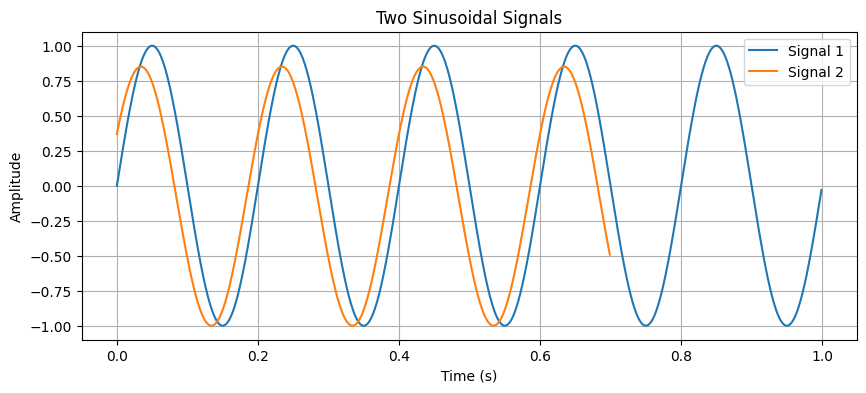

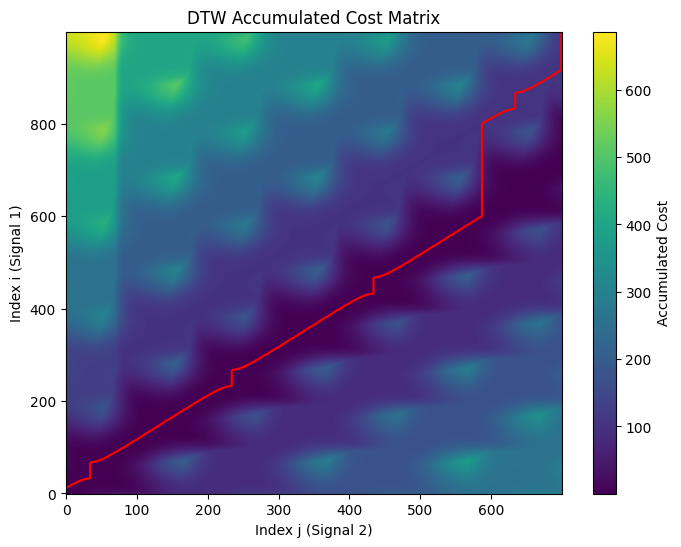

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# 1. Generate two sinusoidal signals
# -----------------------------------------

fs = 1000          # sampling rate
T1 = 1.0           # duration of signal 1
T2 = 0.7           # duration of signal 2 (faster)

t1 = np.linspace(0, T1, int(fs*T1), endpoint=False)
t2 = np.linspace(0, T2, int(fs*T2), endpoint=False)

f = 5  # 5 Hz sine wave

signal1 = np.sin(2 * np.pi * f * t1)               # normal sine wave
signal2 = np.sin(2 * np.pi * f * t2 + 0.5)         # shorter + phase shift

# -----------------------------------------
# 2. Normalize both signals
# -----------------------------------------

def normalize(sig):
    sig = sig - np.mean(sig)
    max_abs = np.max(np.abs(sig))
    return sig / max_abs if max_abs != 0 else sig

x = normalize(signal1)
y = normalize(signal2)

# -----------------------------------------
# 3. DTW implementation
# -----------------------------------------

def dtw(x, y):
    N = len(x)
    M = len(y)
    cost = np.zeros((N, M))

    # Local cost matrix
    for i in range(N):
        for j in range(M):
            cost[i, j] = (x[i] - y[j])**2

    # Accumulated cost matrix
    D = np.zeros((N, M))
    D[0, 0] = cost[0, 0]

    for j in range(1, M):
        D[0, j] = cost[0, j] + D[0, j-1]

    for i in range(1, N):
        D[i, 0] = cost[i, 0] + D[i-1, 0]

    for i in range(1, N):
        for j in range(1, M):
            D[i, j] = cost[i, j] + min(
                D[i-1, j],    # insertion
                D[i, j-1],    # deletion
                D[i-1, j-1]   # match
            )

    # Backtracking to find path
    i, j = N-1, M-1
    path = [(i, j)]

    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            choices = [D[i-1, j], D[i, j-1], D[i-1, j-1]]
            argmin = np.argmin(choices)

            if argmin == 0:
                i -= 1
            elif argmin == 1:
                j -= 1
            else:
                i -= 1
                j -= 1

        path.append((i, j))

    path.reverse()

    return D[N-1, M-1], path, D, cost

# -----------------------------------------
# 4. Run DTW
# -----------------------------------------

dtw_distance, path, D, cost = dtw(x, y)
print("DTW distance =", dtw_distance)
print("Path length =", len(path))

# -----------------------------------------
# 5. Plot both signals
# -----------------------------------------

plt.figure(figsize=(10, 4))
plt.plot(t1, x, label="Signal 1")
plt.plot(t2, y, label="Signal 2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Two Sinusoidal Signals")
plt.legend()
plt.grid()
plt.show()

# -----------------------------------------
# 6. Plot DTW accumulated cost matrix + path
# -----------------------------------------

plt.figure(figsize=(8, 6))
plt.imshow(D, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Accumulated Cost')
plt.title("DTW Accumulated Cost Matrix")
plt.xlabel("Index j (Signal 2)")
plt.ylabel("Index i (Signal 1)")

# Overlay warping path
pi = [p[0] for p in path]
pj = [p[1] for p in path]
plt.plot(pj, pi, color='red')
plt.show()


In [2]:
import numpy as np

fs = 1000     # sampling rate

T1 = 1.0       # duration of Signal 1
T2 = 1.0       # duration of Signal 2

t1 = np.linspace(0, T1, int(fs*T1), endpoint=False)
t2 = np.linspace(0, T2, int(fs*T2), endpoint=False)

f1 = 5    # Frequency of Signal 1 (5 Hz)
f2 = 7    # Frequency of Signal 2 (7 Hz - different)

signal1 = np.sin(2 * np.pi * f1 * t1)           # Signal 1: 5 Hz sine wave
signal2 = 0.8 * np.sin(2 * np.pi * f2 * t2)     # Signal 2: 7 Hz sine wave (scaled)
